# OBJ:
To use cross validation to pick the best models.


# Questions:

    1.Load the data from “glass.csv” and make a bar plot of different types of glasses.
    2.Make a train_test split and fit a single decision tree classifier.
    3.Make a k-fold split with 3 splits and measure the accuracy score with each split[Hint:Refer to KFold module under sklearn’s model selection.]
    4.Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer alongwith a 10-fold cross validation.[Hint:Define a range of estimators and feed in range as param_grid]

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

In [2]:
import os
os.chdir(r'C:\Users\je638474\Documents\JJ\Folders\Udemy\Python EDUREKA')

In [3]:
data = pd.read_csv("glass.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data["Type"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [5]:
types = data["Type"].values
print(np.unique(types))

[1 2 3 5 6 7]


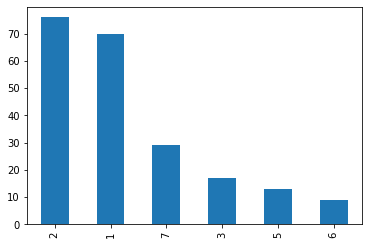

In [6]:
fig, ax = plot.subplots()
data['Type'].value_counts().plot(ax=ax, kind='bar')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values



gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

(171, 9)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_predict = clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy = accuracy_score(y_predict,y_test)

In [14]:
print(accuracy)

0.6976744186046512


In [15]:
for i,c in enumerate(data.columns):
    print (i,c)

0 RI
1 Na
2 Mg
3 Al
4 Si
5 K
6 Ca
7 Ba
8 Fe
9 Type


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  confusion_matrix

In [17]:
k_fold = KFold(3)
print(X_train.shape,y_train.shape)

(171, 9) (171,)


In [18]:
models =[]
for k, (train, test) in enumerate(k_fold.split(X_train, y_train)):
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))
    models.append(clf)

0.7209302325581395
0.6976744186046512
0.7209302325581395


In [19]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_predict = clf.predict(X_test)
print(confusion_matrix(y_predict,y_test))

[[14  1  1  0  0  0]
 [ 4  8  2  0  0  0]
 [ 1  0  3  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  0  4]]


In [21]:
n_estimators_range = [1,2,4,8,16,32]
grid_cv= GridSearchCV(RandomForestClassifier(),param_grid=dict(n_estimators=n_estimators_range),cv=KFold(10))

In [22]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_

In [23]:
grid_cv.best_score_

0.7712418300653594

In [24]:
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_predict = grid_cv.predict(X_test)

In [26]:
conf_mat = confusion_matrix(y_predict,y_test)

In [27]:
print(conf_mat)

[[16  1  3  0  0  0]
 [ 2  9  2  0  0  0]
 [ 1  0  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  0  4]]


# End